# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Jared (Ruotian) Chen
- Jimin Cheon
- Kane Gu
- Laurence D'Ercole
- Nisha Davankar

<a id='research_question'></a>
# Research Question

What attributes of a YouTube video affect its popularity in United States?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Factors that would potentially **affect** a video's popularity:
- time created: `time`
- duration: `length`
- number of tags: `tags`
- video category: `category`
- video quality: `video.quality`
- ad placement: `has_ad	has_ad_at_beginning`
- popularity of youtuber
    - time youtuber joined youtube: `creator.time`
    - number of followers: `creator.stats.follower`
    - total number of views: `creator.stats.view`
    - total number of videos: `creator.stats.post`

Factors that **determine** a video's long-term popularity:
- like/dislike ratio: `stats.like	stats.dislike`
- number of comments: `stats.comment`
- number of views: `stats.view`

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import sys

!{sys.executable} -m pip install --quiet --user --upgrade pandas==1.* numpy matplotlib
!{sys.executable} -m pip install --quiet --user --upgrade -r EDA/requirements.txt

In [1]:
from EDA.goodies import *

In [33]:
from EDA.dcollect import restful
from EDA.dcollect import api_youtube as youtube
from EDA.dcollect import api_youtubei as youtubei

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import patsy
import statsmodels.api as sm

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

'''
dataset_id = 'random'

import string
keyword = '|'.join(string.ascii_letters)



df_search_details = pd.read_pickle(f'EDA/dsamples/youtube_search_{as_fname(keyword)}_{dataset_id}.pkl')

# optional (extra info about channels in our search result)
#df_search_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_search_channels_{as_fname(keyword)}_{dataset_id}.pkl')

'''


df_search_details = pd.read_pickle('EDA/dsamples/youtube_search_random_ascii.pkl')
# optional (extra info about channels in our search result)
#df_search_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_search_channels_random_ascii.pkl')

df_search_details = df_drop_duplicates(df_search_details, level = 'id')
df_report(df_search_details, name = 'Search Results')

"\ndataset_id = 'random'\n\nimport string\nkeyword = '|'.join(string.ascii_letters)\n\n\n\ndf_search_details = pd.read_pickle(f'EDA/dsamples/youtube_search_{as_fname(keyword)}_{dataset_id}.pkl')\n\n# optional (extra info about channels in our search result)\n#df_search_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_search_channels_{as_fname(keyword)}_{dataset_id}.pkl')\n\n"

---

# Results - Search Results

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
bsN96zE8FuE,QAnon 101: The Search for Q,To understand what Q is and why it has been so...,2021-01-25 20:00:06+00:00,0 days 00:46:30,"[vice_videos:premiere, politics, internet, mov...",Entertainment,UCn8zNIfYAQNdrFRrr8oibKw,29754.0,5197.0,15663.0,1653957,HD,False,False
u8Gd9MJsnnE,QAnon: The conspiracy theory spreading fake ne...,Twitter has become the first social media outl...,2020-07-23 23:19:01+00:00,0 days 00:08:59,"[QAnon, conspiracy theory, Donald trump, what ...",News & Politics,UC6o-wWU-v2ClFMwougmK7dA,9614.0,6911.0,11210.0,927526,HD,True,True
Rhum_0F4weU,[NU’EST] Ha99y 9th anniversary ‘Q is.spoiler -...,뉴이스트 9주년 기념 아홉 가지 Q&A!\n9에 진심인 질문과 답변들이 궁금하다면?...,2021-03-10 06:15:00+00:00,0 days 00:01:02,"[뉴이스트, 뉴이스트W, NU'EST, NU'EST W, JR, REN, ARON,...",Music,UCUuyrV8JDv5UAMW2StsL-NA,4350.0,26.0,475.0,14761,HD,True,True
VGrfN3v5JL8,Sitting Down with QAnon Conspiracy Theorists -...,Jim gathers a group of QAnon conspiracy theori...,2018-08-22 01:18:14+00:00,0 days 00:06:21,"[The Jim Jefferies Show, Jim Jefferies, Jim Je...",Comedy,UCUsN5ZwHx2kILm84-jPDeXw,24923.0,9415.0,16787.0,2116763,HD,False,False
w1kebU_p0CA,Julian Assange on Q (AUDIO ONLY),"In a Canadian broadcast exclusive, controversi...",2014-09-29 14:12:57+00:00,0 days 00:35:07,"[cbc, jian ghomeshi, interview, QTV, Julian As...",Entertainment,UC1nw_szfrEsDWcwD32wHE_w,435.0,26.0,144.0,28644,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,1282,1.262000e+03,1.262000e+03,1.157000e+03,1.282000e+03
mean,0 days 00:16:22.436037441,3.681238e+05,4.271235e+04,2.272336e+04,5.977500e+07
std,0 days 00:46:51.925637944,1.437965e+06,2.184774e+05,1.691643e+05,2.973773e+08
min,0 days 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0 days 00:03:35,3.738250e+03,1.070000e+02,1.170000e+02,1.125988e+05
50%,0 days 00:08:02,1.947850e+04,1.015000e+03,9.500000e+02,1.273258e+06
75%,0 days 00:15:08.750000,1.262668e+05,8.589250e+03,5.361000e+03,1.472842e+07
max,0 days 15:13:24,2.110508e+07,4.142134e+06,5.197883e+06,4.417995e+09


---

In [4]:
assert(youtube.types.topic(1).__eq__('Film & Animation'))


df_search_details_n = df_search_details.copy()
df_search_details_n['category'] = df_search_details_n['category'].astype(str)

In [5]:
#df_trending_details = pd.read_pickle('EDA/dsamples/youtube_trending.pkl')

# optional (extra info about channels on the chart)
#df_trending_details_channels = pd.read_pickle(f'EDA/dsamples/youtube_trending_channels.pkl')

#df_report(df_trending_details, name = 'Trending')

In [6]:
#We first reset the index of the dataframe
df_search_details_n= df_search_details_n.reset_index()

In [7]:
#We clean the unecessary information such as dislikes, creator time, creater stats view and creater stats posts
del df_search_details_n['id']
del df_search_details_n['creator.id']
del df_search_details_n['description']
del df_search_details_n['time']
del df_search_details_n['stats.dislike']
del df_search_details_n['video.quality']
del df_search_details_n['has_ad']

In [8]:
#we group the data by if there are ads in the begining and caluculte the mean value of likes, comments and views
has_ad_likes = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.like'].mean()
has_ad_comments = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.comment'].mean()
has_ad_views = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.view'].mean()

has_ad_likes = has_ad_likes.reset_index()
has_ad_comments= has_ad_comments.reset_index()
has_ad_views= has_ad_views.reset_index()

In [9]:
#we group the data based on video category and caluculte the mean value of likes, comments and views
category_likes = df_search_details_n.groupby(['category'])['stats.like'].mean()
category_comments = df_search_details_n.groupby(['category'])['stats.comment'].mean()
category_view = df_search_details_n.groupby(['category'])['stats.view'].mean()

category_likes= category_likes.reset_index()
category_comments= category_comments.reset_index()
category_view= category_view.reset_index()

In [208]:
#we group the data based on tags and calculate the mean value of likes, comments and views
#Replace rows with Nan with 0 tags, and count number of tags in each cell
numTags = df_search_details_n['tags'].str.len()
numTags = numTags.fillna(0)

#For likes
tags_likes = pd.DataFrame({'Tags': numTags, 'Likes': df_search_details_n['stats.like']})
tags_likes = tags_likes.groupby(['Tags']).mean()
tags_likes = tags_likes.reset_index()

#Divide by 1000 to make graph less cluttered
tags_likes['Likes'] = tags_likes['Likes'].div(1000)

#For comments
tags_comments = pd.DataFrame({'Tags': numTags, 'Comments': df_search_details_n['stats.comment']})
tags_comments = tags_comments.groupby(['Tags']).mean()
tags_comments = tags_comments.reset_index()

#Divide by 1000 to make graph less cluttered
tags_comments['Comments'] = tags_comments['Comments'].div(1000)
tags_comments

#For views
tags_views = pd.DataFrame({'Tags': numTags, 'Views': df_search_details_n['stats.view']})
tags_views = tags_views.groupby(['Tags']).mean()
tags_views = tags_views.reset_index()
tags_views

#Divide by 100000 to make graph less cluttered
tags_views['Views'] = tags_views['Views'].div(100000)
tags_views

,Tags,Comments
0,0.0,3.739890
1,1.0,19.780889
2,2.0,9.161900
3,3.0,3.127500
4,4.0,8.402304
...,...,...
62,64.0,0.103000
63,65.0,0.063000
64,67.0,15.012000
65,68.0,14.607000


,Tags,Views
0,0.0,6.604550e+06
1,1.0,8.979970e+06
2,2.0,1.203471e+08
3,3.0,5.848732e+06
4,4.0,3.907994e+07
...,...,...
62,64.0,5.746900e+04
63,65.0,2.540900e+04
64,67.0,2.493442e+06
65,68.0,9.826916e+06


,Tags,Views
0,0.0,66.045497
1,1.0,89.799697
2,2.0,1203.471483
3,3.0,58.487322
4,4.0,390.799360
...,...,...
62,64.0,0.574690
63,65.0,0.254090
64,67.0,24.934420
65,68.0,98.269160


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0, 0.5, 'Average likes')

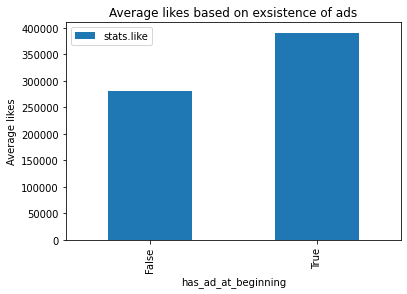

Text(0, 0.5, 'Average comments')

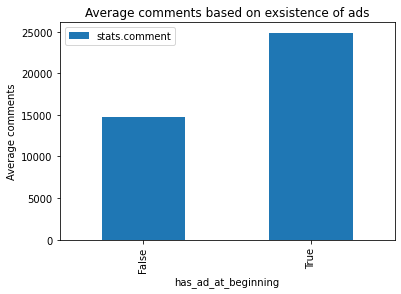

Text(0, 0.5, 'Average views')

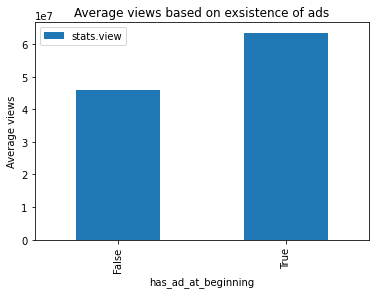

In [11]:
#We plot the averagepopularity (likes, comments, views) compared to the exsistence of ads
ax_likes = has_ad_likes.plot.bar(x= 'has_ad_at_beginning', y= 'stats.like', title= "Average likes based on exsistence of ads")
ax_likes.set_ylabel("Average likes")
plt.show()
ax_comments= has_ad_comments.plot.bar(x= 'has_ad_at_beginning', y= 'stats.comment',  title= "Average comments based on exsistence of ads")
ax_comments.set_ylabel("Average comments")
plt.show()
ax_views= has_ad_views.plot.bar(x= 'has_ad_at_beginning', y= 'stats.view', title= "Average views based on exsistence of ads")
ax_views.set_ylabel("Average views")
plt.show()

The plots above compare the vidoes that had an ad at the begining of the vidoe and videos that do not have ads at the begining of a video. The first plot compares has_ad_at_begining to the average likes. The second plot compares has_ad_at_begining to average comments and the final lot compares has_ad_at_begining to average views. We can see that in all three cases, the popularity of the videos is higher when there is an ad attached to the video. 

Text(0, 0.5, 'Average likes')

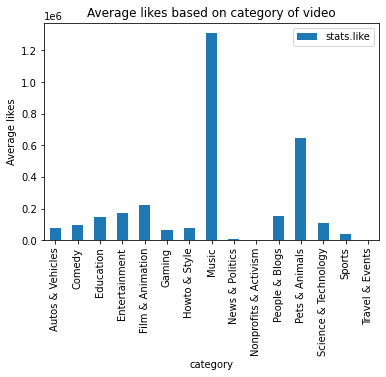

Text(0, 0.5, 'Average comments')

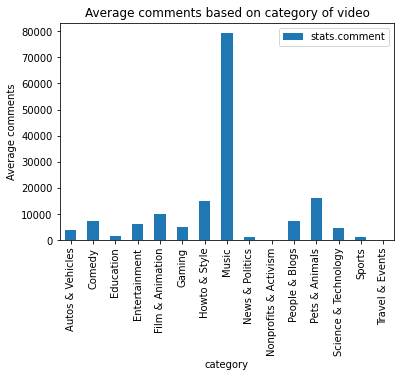

Text(0, 0.5, 'Average views')

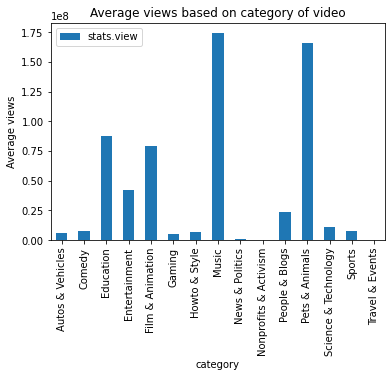

In [12]:
#We plot the averagepopularity (likes, comments, views) compared to the category of the videos
ax_category_likes = category_likes.plot.bar(x= 'category', y= 'stats.like', title= "Average likes based on category of video")
ax_category_likes.set_ylabel("Average likes")
plt.show()
ax_category_comments = category_comments.plot.bar(x= 'category', y= 'stats.comment', title= "Average comments based on category of video")
ax_category_comments.set_ylabel("Average comments")
plt.show()
ax_category_views = category_view.plot.bar(x= 'category', y= 'stats.view', title= "Average views based on category of video")
ax_category_views.set_ylabel("Average views")
plt.show()

The plots above compare the the category of the videos and to the popularity of videos The first plot compares category to the average likes. The second plot compares category to average comments and the final lot compares category to average views. We can see that in all three cases, that the music category has high popularity is comparison to the other categories. We also notice that within popularity, views are high in the pets and animals category.

<AxesSubplot:xlabel='bin', ylabel='Likes'>

Text(0.5, 1.0, 'Likes vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Likes (Thousands)')

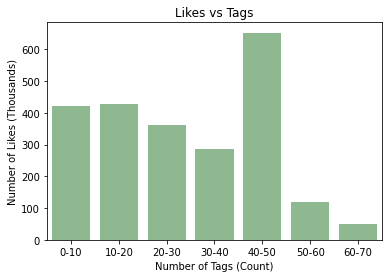

In [218]:
# Compare the number of likes to number of tags

#Fixes the issue where 0 tages was not being binned into first bin
tags_likes.at[0,'Tags'] = 1
tags_likes['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Likes', color="#87bf89", data=tags_likes, ci=None)
plt.title("Likes vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Likes (Thousands)")

[Text(0.5, 0, 'Number of Tags'), Text(0, 0.5, 'Number of Likes')]

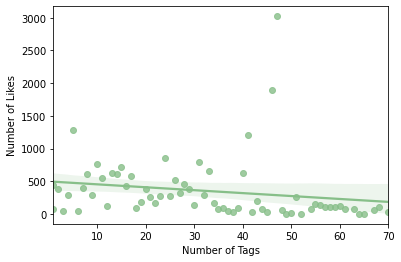

In [219]:
ax3 = sns.regplot(x="Tags", y= "Likes", color= "#87bf89", data=tags_likes)
ax3.set(xlabel='Number of Tags', ylabel='Number of Likes')

<AxesSubplot:xlabel='bin', ylabel='Comments'>

Text(0.5, 1.0, 'Comments vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Comments (Thousands)')

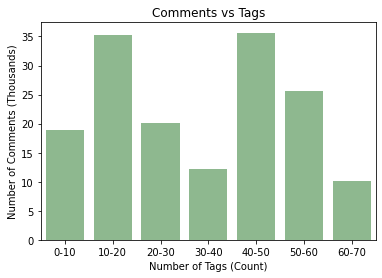

In [220]:
# Compare the number of comments to number of tags

#Fixes the issue where 0 tages was not being binned into first bin
tags_comments.at[0,'Tags'] = 1
tags_comments['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Comments', color="#87bf89", data=tags_comments, ci=None)
plt.title("Comments vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Comments (Thousands)")

<AxesSubplot:xlabel='bin', ylabel='Views'>

Text(0.5, 1.0, 'Views vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Views (Hundred Thousands)')

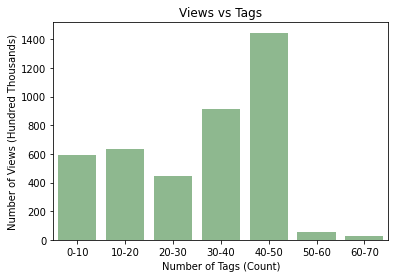

In [221]:
# Compare the number of views to number of tags

#Fixes the issue where 0 tags was not being binned into first bin
tags_views.at[0,'Tags'] = 1
tags_views['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Views', color="#87bf89", data=tags_views, ci=None)
plt.title("Views vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Views (Hundred Thousands)")

-The above three plots compare the number of tags to likes, comments, and views. When observing all three graphs, 40-50 tags consistently seem to perform relatively well in each metric. This is apparent in Likes vs Tags and Views vs Tags distribution, but less so in Comments vs Tags plot due to it being a bimodal distribution. 

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*